In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
import matplotlib.patches as mpatches 

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from scipy.stats import pearsonr
from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv("wdbc.csv")
df

,Ob,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Pairplot helps us to visualize the relationship between the top ten features (mean features). The plots on the diagonal line describes the distribution of individual features in each category, and the plots in the upper triangle and the lower triangle illustrate the pairwise relationships between different features. It is obvious that there is strong correlation between the radius, the perimeter, and the area. In data analysis we only need to keep one of such features so that the features are independent to one another. By observation, we can also know that there is a linear relationship between the concavity and the concave point, and between the concavity and the compactness.

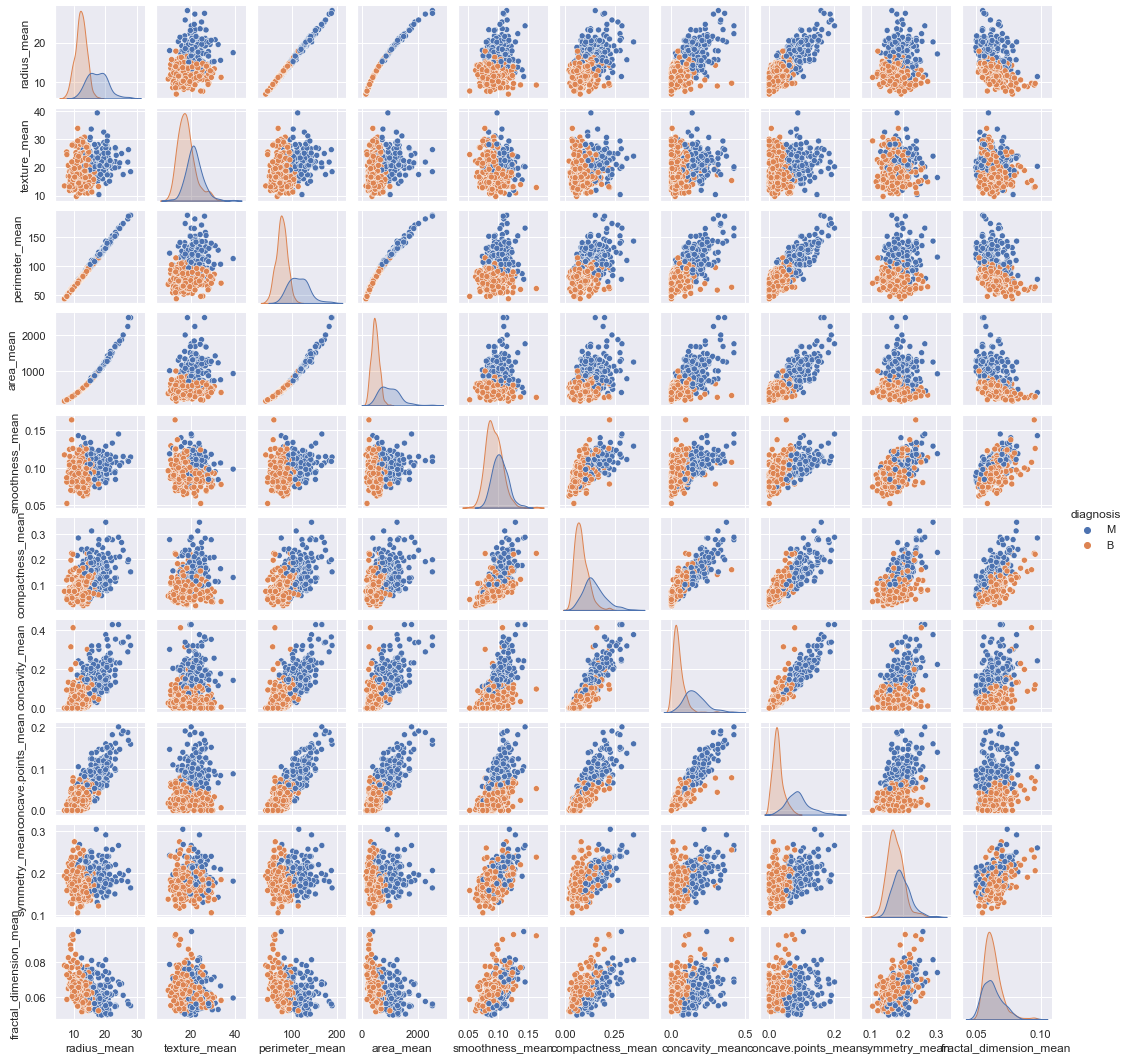

In [3]:
cols = df.columns.values.tolist()
cols = cols[1:12]
sns.pairplot(df[cols],hue='diagnosis', height=1.5)

## Bivariate analysis and pearson correlation coefficient 
Pearson is a statistic used to reflect the similarity between two variables. In machine learning, it can be used to calculate the similarity between features and categories, which can judge whether the extracted features and categories are positively correlated, negatively correlated or not. 

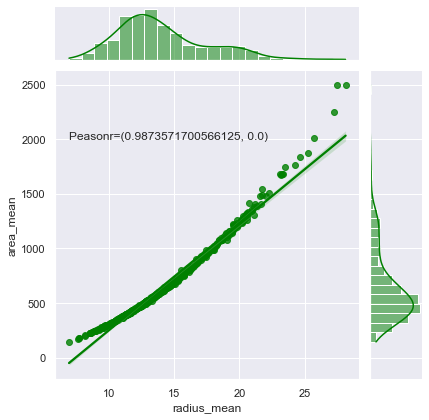

In [4]:
#Bivariate analysis
p1 = pearsonr(df['radius_mean'], df['area_mean'])
fg1=sns.jointplot(x='radius_mean', y='area_mean',data=df,kind="reg",color="green")
fg1.ax_joint.text(7,2000,"Peasonr="+str(p1))
plt.show()

Jointplot is used to show the relationship between the radius_mean and the area_mean and calculate the Pearson correlation coefficient is 0.98735. However, Pearson correlation coefficient is used to measure the linear correlation, and the two variables cannot be judged as linear  because the linear correlation coefficient is large. From the plot, the coordinate points of the sample are roughly on a quadratic function curve, but they are not strictly distributed on a curve, so the radius and area need to be regarded as independent features.

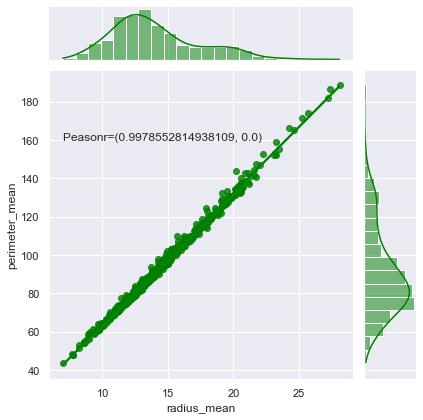

In [5]:
p2 = pearsonr(df['radius_mean'], df['perimeter_mean'])
fg2=sns.jointplot(x='radius_mean', y='perimeter_mean',data=df,kind="reg",color="green")
fg2.ax_joint.text(7,160,"Peasonr="+str(p2))
plt.show()

The Jointplot is used to show the linear relationship between the mean value of radius and perimeter. It can be seen that the two variables can be well described by the linear equation, and all sample points fall on a straight line. Pearson correlation coefficient reached 0.99 and it belongs to extremely strong linear correlation.

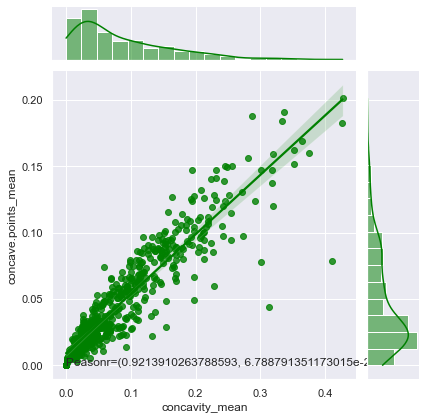

In [6]:
p3 = pearsonr(df['concavity_mean'], df['concave.points_mean'])
fg3=sns.jointplot(x='concavity_mean', y='concave.points_mean',data=df,kind="reg",color="green")
fg3.ax_joint.text(0,0,"Peasonr="+str(p3))
plt.show()

Jointplot is used to show the relationship between the concavity_mean and the concave.points_mean. The plot show the linear relationship between them, and calculate the Pearson correlation coefficient is 0.92. The correlation intensity of the two variables is very strong correlation.

## Data preprocessing
The data type of tag diagnosis is character, "B" indicates benign and "m" indicates malignant. Use labelencoder to digitize it and encode the tag value as 0,1, so that it can be used as the training tag of the model.

In [7]:
encoder = preprocessing.LabelEncoder().fit(df['diagnosis'])
df['diagnosis'] = encoder.transform(df['diagnosis'])
X = df.drop(['diagnosis','Ob'],axis = 1)
y = df['diagnosis']

## Data visualization- TSNE dimensionality reduction
Drawing TSNE diagram is dimensionality reduction method. The purpose is to map high-dimensional data to two-dimensional space. visualize and analyze the distribution of data. 

Firstly, We draw TSNE diagram for the original dataset.

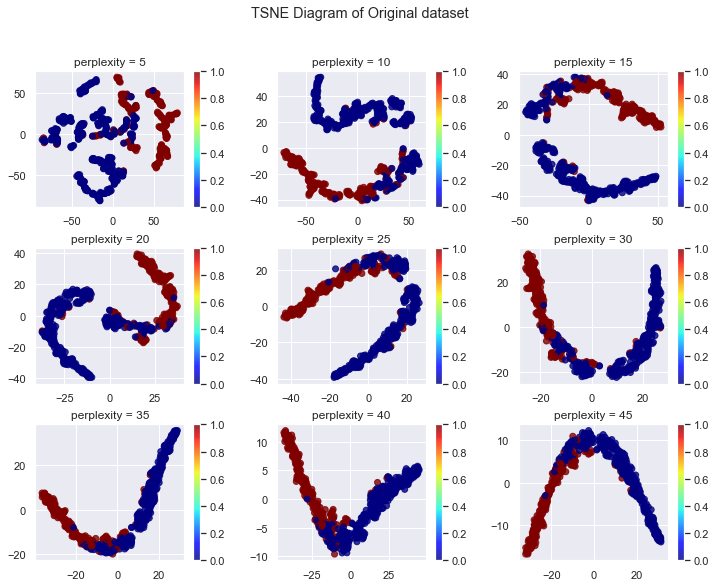

In [8]:
# Draw tsne diagram
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(3, 3, figsize=(12,9))
plt.subplots_adjust(wspace =0.3, hspace =0.3)
# perplexity from 5~45
k = 0
for i in range(3):
    for j in range(3):
        l = (k+1)*5
        tsne = TSNE(n_components=2, perplexity=l)
        dataset_tsne = tsne.fit_transform(X)
        ax1 = axes[i,j].scatter(dataset_tsne[:, 0], dataset_tsne[:, 1], c = y, cmap="jet",alpha=0.8)
        f.colorbar(ax1, ax = axes[i,j])
        axes[i,j].set_title('perplexity = ' + str(l))
        k = k+1
plt.suptitle('TSNE Diagram of Original dataset',ha='center')
plt.savefig(r'.\\pic\\TSNE_orgin.png')
plt.show()

## Standardization 
Every original data set may have differences in orders in dimension and different magnitudes. If we do not make modifications to them and use the original value directly, this will highlight the role of the features with higher numerical value in the analysis and weaken the role of the features with lower numerical value. To ensure the reliability of our results, we need to standardize the original data. After standardization, every feature has a mean of 0 and a standard deviation of 1. 

In [9]:
X_mean=X.mean(axis=0)
X_std=X.std(axis=0)
X_scaled= (X-X_mean)/X_std

For comparison, We draw TSNE diagram for the scaled dataset.

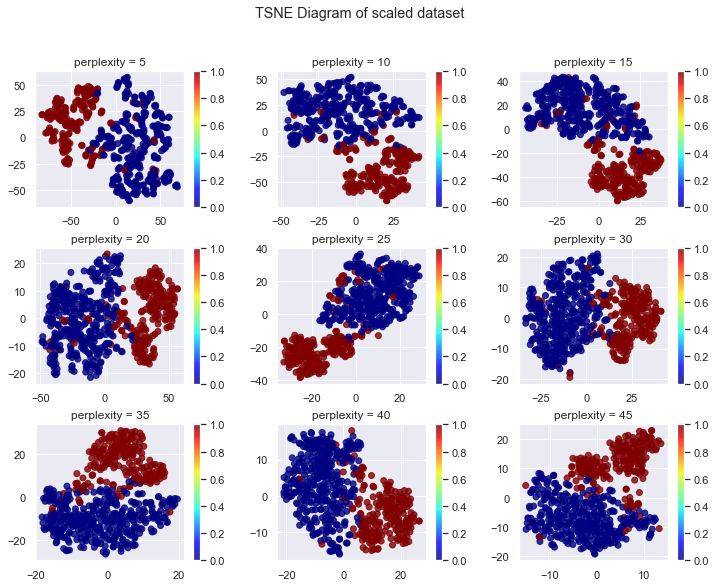

In [10]:
# Draw tsne diagram
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(3, 3, figsize=(12,9))
plt.subplots_adjust(wspace =0.3, hspace =0.3)
# perplexity from 5~45
k = 0
for i in range(3):
    for j in range(3):
        l = (k+1)*5
        tsne = TSNE(n_components=2, perplexity=l)
        dataset_tsne = tsne.fit_transform(X_scaled)
        ax1 = axes[i,j].scatter(dataset_tsne[:, 0], dataset_tsne[:, 1], c = y, cmap="jet",alpha=0.8)
        f.colorbar(ax1, ax = axes[i,j])
        axes[i,j].set_title('perplexity = ' + str(l))
        k = k+1
plt.suptitle('TSNE Diagram of scaled dataset',ha='center')
plt.savefig(r'.\\pic\\TSNE_scaled.png')
plt.show()

We plot the kde diagram of the dataset before standardization. As shown in the figure on the left, the distributions of different features vary greatly. For example, the behavior features of the factorial dimension are few and is small numerically, while the mean characteristic of the area is widely distributed and has a large value. After we standardize the feature data, we eliminate the dimensional differences between the different features, as shown in the figure on the right. Therefore the role of the features in this model will not be influenced by the difference in dimensions, and thus guarantee the reliability of the classification results. 

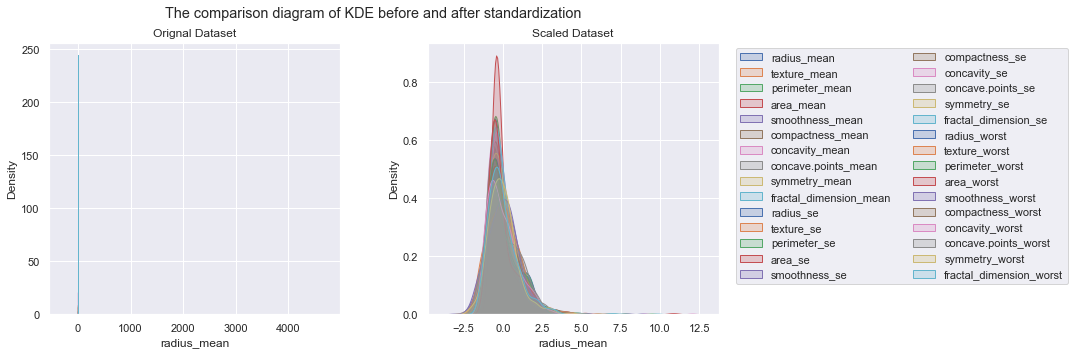

In [11]:
# Draw the comparison diagram of KDE before and after standardization
features = df.columns.values.tolist()
# Slice the list and remove the label and ID
features = features[2:32]
f, axes = plt.subplots(1, 2, figsize = (12, 5), sharex=False)
plt.subplots_adjust(wspace =0.3, hspace =0.1)
for i in range(0,30):
    sns.kdeplot(X.iloc[:,i], label=features[i], shade=True, ax=axes[0])
    sns.kdeplot(X_scaled.iloc[:,i], label=features[i], shade=True, ax=axes[1])
axes[0].set(title = "Orignal Dataset")
axes[1].set(title = "Scaled Dataset")
plt.legend(ncol=2,bbox_to_anchor=(1.04,1),loc="upper left")
plt.suptitle('The comparison diagram of KDE before and after standardization',ha='center')
plt.savefig(r'.\\pic\\analyse_scaled_ra1.jpg' )

We choose six features, including two mean features, two variance features and two maximum features. These three types of data are different in terms of properties and magnitudes. Before we standardize the features of datasets, we can observe, as shown in the graph on the left, that the standard deviation feature value distribution is concentrated in a small interval with a small value. The mean feature distribution, however, is wide and the value is large. As shown in the right figure. After standardization, the distribution of features falls into the same interval, which ensures the reliability of classification.

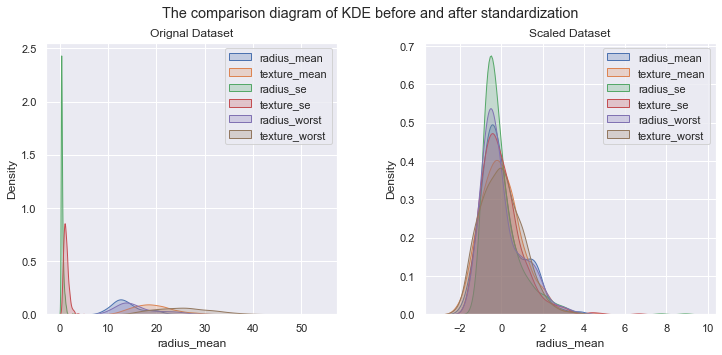

In [12]:
# Draw the comparison diagram of KDE before and after standardization
features = df.columns.values.tolist()
# Slice the list and remove the label and ID
features = features[2:32]
f, axes = plt.subplots(1, 2, figsize = (12, 5), sharex=False)
plt.subplots_adjust(wspace =0.3, hspace =0.1)
for i in [0, 1, 10, 11, 20, 21]: 
    sns.kdeplot(X.iloc[:,i], label=features[i], shade=True, ax=axes[0])
    sns.kdeplot(X_scaled.iloc[:, i], label=features[i], shade=True, ax=axes[1])
axes[0].set(title = "Orignal Dataset")
axes[1].set(title = "Scaled Dataset")
axes[0].legend()
axes[1].legend()
plt.suptitle('The comparison diagram of KDE before and after standardization',ha='center')
plt.savefig(r'.\\pic\\analyse_scaled_ra.jpg' )

Here we display a plot of the TSNE graph after the data standardization. We can see from the plot that the sample separation has greatly improved. 

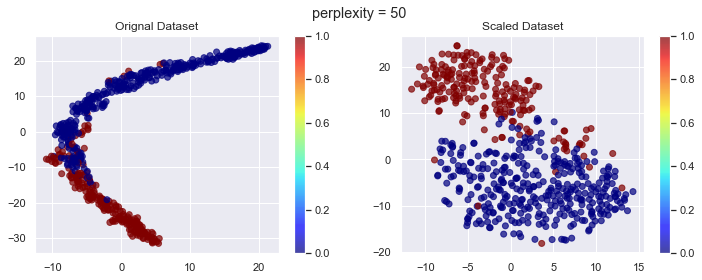

In [13]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(1, 2, figsize=(12,4))
tsne = TSNE(n_components=2, perplexity = 50)
dataset_tsne = tsne.fit_transform(X)
dataset_scaled = tsne.fit_transform(X_scaled)
ax1 = axes[0].scatter(dataset_tsne[:, 0], dataset_tsne[:, 1], c = y, alpha = 0.7,cmap="jet")
ax2 = axes[1].scatter(dataset_scaled[:, 0], dataset_scaled[:, 1], c = y, alpha = 0.7,cmap="jet")
axes[0].set(title = "Orignal Dataset")
axes[1].set(title = "Scaled Dataset")
f.colorbar(ax1, ax = axes[0])
f.colorbar(ax2, ax = axes[1])
plt.suptitle('perplexity = 50',ha='center')
plt.savefig(r'.\\pic\\TSNE_TSNE_scaled.png')

## Feature Selection 
Feature selection:
This is the process of selecting the most effective features form a pool of original features to reduce data dimension. Since this dataset has many features, feature selection is a good way to improve the performance of the machine learning algorithm. 

SelectKBest selects the best characteristics and uses analysis of variance to calculate feature scores. In general, variance analysis is to test whether a random variable has gone through significant changes if it is tested under different levels. This is used to test the correlation between two variables. It is clear that the mean and maximum values of the radius, perimeter, area, concavity, and concave points are the best features.

In [14]:
#Feature selection -- kbest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
classifer = SelectKBest(f_classif, k=10).fit(X_scaled, y)
mask = classifer.get_support()
X_new = classifer.transform(X)
features = df.columns.values.tolist()[2:]
feature_new = []
for feature, boolean in zip(features, mask):  
    if boolean == True:
        feature_new.append(feature)
print(feature_new)

['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave.points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave.points_worst']
